In [1]:
# The following code is a classification neural network

# Import all packages and libraries for NN

# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import argmax
from keras.utils import to_categorical
from matplotlib import pyplot

import numpy
import keras
import pandas
import collections


Using TensorFlow backend.


In [2]:
# Data Processing
# Preparing Iris dataset for usage as a dataframe
# Encoding output variables
# Shuffle rows randomly for variety
# Spliting dataset to test and train dataframes. Test dataset will be 80% of entire dataframe.
# Parsing dataframe to features and labels (x_train and y_train)

# Constants
_training_split = 0.8


# Spliting dataframe to training and testing
def split_to_training(dataframe):
    train_df = dataframe[:int(len(dataframe)*_training_split)]
    
    return train_df


def split_to_testing(dataframe):
    test_df = dataframe[int(len(dataframe)*_training_split):]
    
    return test_df


# Spliting training or testing dataset to x and y
def split_to_x(dataframe):
    x = dataframe[features].values
    
    return x


def split_to_y(dataframe):
    y = dataframe[labels].values
    
    return y


# Encoding all labels with HOT Encoder
def encode_dataframe(label_y):
    encoder = LabelEncoder()
    encoder.fit(label_y)
    encoded_Y = encoder.transform(label_y)
    new_y = np_utils.to_categorical(encoded_Y)
    
    return new_y


def prep_data(df):
    pass
    
# Load in dataset
dataframe = pandas.read_csv('iris.csv')
df = shuffle(dataframe)
features = list(df.columns.values)[:-1]
labels = list(df.columns.values)[-1]
input_dim = len(list(df.columns.values)[:-1])

train_df = split_to_training(df)
x_train = split_to_x(train_df)
y_train = encode_dataframe(split_to_y(train_df))

test_df = split_to_testing(df)
x_test = split_to_x(test_df)
y_test = encode_dataframe(split_to_y(test_df))



In [3]:
class KerasNeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
        
    def run(self):
        _number_of_test_models = 2
        
        base_number_layers = int(input_dim**.5)
#       group_models { loss_value: respective model {}
        group_models = {}

        list_of_history = []
        for i in range(_number_of_test_models):
            model = Sequential()
            
            # Base number of layers
            model.add(Dense(input_dim, input_dim=input_dim, activation='sigmoid'))
            
            # Loop adds an extra hidden layer after each individual model is trained
            for i in range(base_number_layers):
                model.add(Dense(4, activation='sigmoid'))
            model.add(Dense(3, activation='sigmoid'))
            model.summary()
        
            model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
            history = model.fit(self.x_train, self.y_train, epochs=300, validation_split=0.2)                 
            scores = model.evaluate(self.x_test, self.y_test)
            
            
            # Map each loss with its respective model
            # Note that group_models[0] = 'model object' and group_models[1] = the'history object'
            group_models[scores[0]] = model, history
                                    
            pyplot.plot(history.history['loss'])
            pyplot.plot(history.history['val_loss'])
            pyplot.title('Loss After Each Epoch')
            pyplot.ylabel('loss')
            pyplot.xlabel('epoch')
            
            scores = model.evaluate(self.x_test, self.y_test)
            print("{}: {}".format(model.metrics_names[0], scores[0]))
            print("{}: {}%".format(model.metrics_names[1], scores[1]*100))
            base_number_layers += 1
        
        pyplot.legend(['2HL','val_2HL','3HL','val_3HL','4HL','val_4HL','5HL',
                       'val_5HL','6HL','val_6HL','7HL','val_7HL','8HL','val_8HL'], loc='upper right')
        pyplot.show()
        
        # sort the dictionary
        ordered_group_models = collections.OrderedDict(sorted(group_models.items()))
        
        
        # Use models starting from the lowest loss. If it is overfitted, take the second lowest loss and so on.
        # for i, v in ordered_group_models.items():
        # overfitted = False
        
        overfitted = False
        for key, value in ordered_group_models.items():
            list_of_loss = value[1].history['loss']
            list_of_val_loss = value[1].history['val_loss']
            print(list_of_loss)
            print(list_of_val_loss)
            
            for i in range(len(list_of_loss)):
                if list_of_loss[i] < list_of_val_loss[i]:
                    overfitted = True
                    break # the model is overfitted
                    
            if not overfitted:
                optimized_model = value[0]
                optimized_history = value[1]
                break # exit loop because we have found optimized model
                
            overfitted = False
            
                
        # Evaluating the optimized model
        scores = optimized_model.evaluate(self.x_test, self.y_test)
        print("{}: {}".format(optimized_model.metrics_names[0], scores[0]))
        print("{}: {}%".format(optimized_model.metrics_names[1], scores[1]*100))

                
        pyplot.plot(optimized_history.history['loss'])
        pyplot.plot(optimized_history.history['val_loss'])
        pyplot.title('Loss and Val_Loss vs Epoch')
        pyplot.ylabel('loss')
        pyplot.xlabel('epoch')
        pyplot.legend(['Loss','Val_Loss'], loc='upper right')
        pyplot.show()
        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Train on 96 samples, validate on 24 samples
Epoch 1/300
96/96 [==============================] - 0s 4ms/step - loss: 0.5195 - acc: 0.3438 - val_loss: 0.5291 - val_acc: 0.2500
Epoch 2/300
96/96 [==============================] - 0s 104us/step - loss: 0.5185 - acc: 0.3438 - val_l

96/96 [==============================] - 0s 124us/step - loss: 0.4704 - acc: 0.3438 - val_loss: 0.4858 - val_acc: 0.2500
Epoch 56/300
96/96 [==============================] - 0s 122us/step - loss: 0.4695 - acc: 0.3438 - val_loss: 0.4851 - val_acc: 0.2500
Epoch 57/300
96/96 [==============================] - 0s 126us/step - loss: 0.4688 - acc: 0.3438 - val_loss: 0.4844 - val_acc: 0.2500
Epoch 58/300
96/96 [==============================] - 0s 111us/step - loss: 0.4680 - acc: 0.3438 - val_loss: 0.4837 - val_acc: 0.2500
Epoch 59/300
96/96 [==============================] - 0s 117us/step - loss: 0.4671 - acc: 0.3438 - val_loss: 0.4830 - val_acc: 0.2500
Epoch 60/300
96/96 [==============================] - 0s 124us/step - loss: 0.4664 - acc: 0.3438 - val_loss: 0.4823 - val_acc: 0.2500
Epoch 61/300
96/96 [==============================] - 0s 117us/step - loss: 0.4656 - acc: 0.3438 - val_loss: 0.4816 - val_acc: 0.2500
Epoch 62/300
96/96 [==============================] - 0s 111us/step - loss:

96/96 [==============================] - 0s 94us/step - loss: 0.4297 - acc: 0.3438 - val_loss: 0.4474 - val_acc: 0.2500
Epoch 117/300
96/96 [==============================] - 0s 113us/step - loss: 0.4291 - acc: 0.3438 - val_loss: 0.4468 - val_acc: 0.2500
Epoch 118/300
96/96 [==============================] - 0s 107us/step - loss: 0.4286 - acc: 0.3438 - val_loss: 0.4463 - val_acc: 0.2500
Epoch 119/300
96/96 [==============================] - 0s 100us/step - loss: 0.4280 - acc: 0.3438 - val_loss: 0.4457 - val_acc: 0.2500
Epoch 120/300
96/96 [==============================] - 0s 100us/step - loss: 0.4275 - acc: 0.3438 - val_loss: 0.4451 - val_acc: 0.2500
Epoch 121/300
96/96 [==============================] - 0s 111us/step - loss: 0.4270 - acc: 0.3438 - val_loss: 0.4446 - val_acc: 0.2500
Epoch 122/300
96/96 [==============================] - 0s 139us/step - loss: 0.4264 - acc: 0.3438 - val_loss: 0.4440 - val_acc: 0.2500
Epoch 123/300
96/96 [==============================] - 0s 116us/step -

Epoch 177/300
96/96 [==============================] - 0s 146us/step - loss: 0.4007 - acc: 0.3438 - val_loss: 0.4157 - val_acc: 0.2500
Epoch 178/300
96/96 [==============================] - 0s 132us/step - loss: 0.4002 - acc: 0.3438 - val_loss: 0.4152 - val_acc: 0.2500
Epoch 179/300
96/96 [==============================] - 0s 127us/step - loss: 0.3999 - acc: 0.3438 - val_loss: 0.4147 - val_acc: 0.2500
Epoch 180/300
96/96 [==============================] - 0s 125us/step - loss: 0.3995 - acc: 0.3438 - val_loss: 0.4143 - val_acc: 0.2500
Epoch 181/300
96/96 [==============================] - 0s 131us/step - loss: 0.3991 - acc: 0.3438 - val_loss: 0.4138 - val_acc: 0.2500
Epoch 182/300
96/96 [==============================] - 0s 137us/step - loss: 0.3987 - acc: 0.3438 - val_loss: 0.4134 - val_acc: 0.2500
Epoch 183/300
96/96 [==============================] - 0s 133us/step - loss: 0.3983 - acc: 0.3438 - val_loss: 0.4129 - val_acc: 0.2500
Epoch 184/300
96/96 [==============================] - 

Epoch 238/300
96/96 [==============================] - 0s 96us/step - loss: 0.3804 - acc: 0.3438 - val_loss: 0.3914 - val_acc: 0.2500
Epoch 239/300
96/96 [==============================] - 0s 105us/step - loss: 0.3801 - acc: 0.3438 - val_loss: 0.3910 - val_acc: 0.2500
Epoch 240/300
96/96 [==============================] - 0s 115us/step - loss: 0.3799 - acc: 0.3438 - val_loss: 0.3907 - val_acc: 0.2500
Epoch 241/300
96/96 [==============================] - 0s 106us/step - loss: 0.3796 - acc: 0.3438 - val_loss: 0.3904 - val_acc: 0.2500
Epoch 242/300
96/96 [==============================] - 0s 107us/step - loss: 0.3794 - acc: 0.3438 - val_loss: 0.3901 - val_acc: 0.2500
Epoch 243/300
96/96 [==============================] - 0s 114us/step - loss: 0.3791 - acc: 0.3438 - val_loss: 0.3897 - val_acc: 0.2500
Epoch 244/300
96/96 [==============================] - 0s 114us/step - loss: 0.3788 - acc: 0.3438 - val_loss: 0.3894 - val_acc: 0.2500
Epoch 245/300
96/96 [==============================] - 0

Epoch 299/300
96/96 [==============================] - 0s 110us/step - loss: 0.3671 - acc: 0.3438 - val_loss: 0.3748 - val_acc: 0.2500
Epoch 300/300
30/30 [==============================] - 0s 28us/step
loss: 0.3643434941768646
acc: 36.666667461395264%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 15        
Total params: 95
Trai

96/96 [==============================] - 0s 119us/step - loss: 0.4749 - acc: 0.3125 - val_loss: 0.4652 - val_acc: 0.4167
Epoch 52/300
96/96 [==============================] - 0s 117us/step - loss: 0.4741 - acc: 0.3125 - val_loss: 0.4644 - val_acc: 0.4167
Epoch 53/300
96/96 [==============================] - 0s 120us/step - loss: 0.4733 - acc: 0.3125 - val_loss: 0.4636 - val_acc: 0.4167
Epoch 54/300
96/96 [==============================] - 0s 119us/step - loss: 0.4724 - acc: 0.3125 - val_loss: 0.4627 - val_acc: 0.4167
Epoch 55/300
96/96 [==============================] - 0s 127us/step - loss: 0.4716 - acc: 0.3125 - val_loss: 0.4619 - val_acc: 0.4167
Epoch 56/300
96/96 [==============================] - 0s 124us/step - loss: 0.4708 - acc: 0.3125 - val_loss: 0.4610 - val_acc: 0.4167
Epoch 57/300
96/96 [==============================] - 0s 119us/step - loss: 0.4700 - acc: 0.3125 - val_loss: 0.4602 - val_acc: 0.4167
Epoch 58/300
96/96 [==============================] - 0s 126us/step - loss:

96/96 [==============================] - 0s 126us/step - loss: 0.4260 - acc: 0.3125 - val_loss: 0.4171 - val_acc: 0.4167
Epoch 113/300
96/96 [==============================] - 0s 130us/step - loss: 0.4253 - acc: 0.3125 - val_loss: 0.4164 - val_acc: 0.4167
Epoch 114/300
96/96 [==============================] - 0s 121us/step - loss: 0.4246 - acc: 0.3125 - val_loss: 0.4158 - val_acc: 0.4167
Epoch 115/300
96/96 [==============================] - 0s 116us/step - loss: 0.4238 - acc: 0.3125 - val_loss: 0.4151 - val_acc: 0.4167
Epoch 116/300
96/96 [==============================] - 0s 108us/step - loss: 0.4231 - acc: 0.3125 - val_loss: 0.4144 - val_acc: 0.4167
Epoch 117/300
96/96 [==============================] - 0s 126us/step - loss: 0.4224 - acc: 0.3125 - val_loss: 0.4137 - val_acc: 0.4167
Epoch 118/300
96/96 [==============================] - 0s 128us/step - loss: 0.4217 - acc: 0.3125 - val_loss: 0.4131 - val_acc: 0.4167
Epoch 119/300
96/96 [==============================] - 0s 136us/step 

Epoch 173/300
96/96 [==============================] - 0s 122us/step - loss: 0.3895 - acc: 0.3125 - val_loss: 0.3835 - val_acc: 0.4167
Epoch 174/300
96/96 [==============================] - 0s 123us/step - loss: 0.3891 - acc: 0.3125 - val_loss: 0.3830 - val_acc: 0.4167
Epoch 175/300
96/96 [==============================] - 0s 131us/step - loss: 0.3886 - acc: 0.3125 - val_loss: 0.3826 - val_acc: 0.4167
Epoch 176/300
96/96 [==============================] - 0s 111us/step - loss: 0.3882 - acc: 0.3125 - val_loss: 0.3822 - val_acc: 0.4167
Epoch 177/300
96/96 [==============================] - 0s 127us/step - loss: 0.3877 - acc: 0.3125 - val_loss: 0.3818 - val_acc: 0.4167
Epoch 178/300
96/96 [==============================] - 0s 132us/step - loss: 0.3873 - acc: 0.3125 - val_loss: 0.3814 - val_acc: 0.4167
Epoch 179/300
96/96 [==============================] - 0s 125us/step - loss: 0.3868 - acc: 0.3125 - val_loss: 0.3810 - val_acc: 0.4167
Epoch 180/300
96/96 [==============================] - 

Epoch 234/300
96/96 [==============================] - 0s 123us/step - loss: 0.3676 - acc: 0.3125 - val_loss: 0.3640 - val_acc: 0.4167
Epoch 235/300
96/96 [==============================] - 0s 117us/step - loss: 0.3674 - acc: 0.3125 - val_loss: 0.3637 - val_acc: 0.4167
Epoch 236/300
96/96 [==============================] - 0s 128us/step - loss: 0.3671 - acc: 0.3125 - val_loss: 0.3635 - val_acc: 0.4167
Epoch 237/300
96/96 [==============================] - 0s 108us/step - loss: 0.3668 - acc: 0.3125 - val_loss: 0.3633 - val_acc: 0.4167
Epoch 238/300
96/96 [==============================] - 0s 128us/step - loss: 0.3666 - acc: 0.3125 - val_loss: 0.3630 - val_acc: 0.4167
Epoch 239/300
96/96 [==============================] - 0s 134us/step - loss: 0.3663 - acc: 0.3125 - val_loss: 0.3628 - val_acc: 0.4167
Epoch 240/300
96/96 [==============================] - 0s 131us/step - loss: 0.3661 - acc: 0.3125 - val_loss: 0.3626 - val_acc: 0.4167
Epoch 241/300
96/96 [==============================] - 

Epoch 295/300
96/96 [==============================] - 0s 142us/step - loss: 0.3553 - acc: 0.3125 - val_loss: 0.3531 - val_acc: 0.4167
Epoch 296/300
96/96 [==============================] - 0s 160us/step - loss: 0.3552 - acc: 0.3125 - val_loss: 0.3530 - val_acc: 0.4167
Epoch 297/300
96/96 [==============================] - 0s 136us/step - loss: 0.3550 - acc: 0.3125 - val_loss: 0.3528 - val_acc: 0.4167
Epoch 298/300
96/96 [==============================] - 0s 136us/step - loss: 0.3549 - acc: 0.3125 - val_loss: 0.3527 - val_acc: 0.4167
Epoch 299/300
96/96 [==============================] - 0s 132us/step - loss: 0.3547 - acc: 0.3125 - val_loss: 0.3526 - val_acc: 0.4167
Epoch 300/300
30/30 [==============================] - 0s 38us/step
loss: 0.3544222414493561
acc: 33.33333432674408%


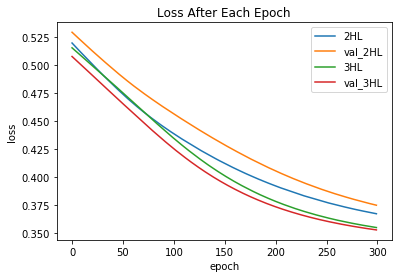

[0.5151605010032654, 0.5143791238466898, 0.5135753750801086, 0.5127783417701721, 0.5119520425796509, 0.511167307694753, 0.5103645126024882, 0.509570320447286, 0.5087696313858032, 0.5079987446467081, 0.5072089036305746, 0.5064282417297363, 0.5056346654891968, 0.5048408905665079, 0.5040481785933176, 0.5032673676808676, 0.5024622678756714, 0.5016690293947855, 0.500874658425649, 0.5000800689061483, 0.4992792308330536, 0.4984790583451589, 0.497671514749527, 0.4968661367893219, 0.4960734446843465, 0.4952548146247864, 0.49444762865702313, 0.4936362604300181, 0.4928263823191325, 0.49201441804567975, 0.4912068446477254, 0.4904017945130666, 0.48959516485532123, 0.4887685378392537, 0.4879641632239024, 0.4871511956055959, 0.48633909225463867, 0.48552435636520386, 0.48470671971638996, 0.48389240105946857, 0.48309948047002155, 0.48226629694302875, 0.4814603527386983, 0.48063676555951435, 0.47981977462768555, 0.47900546590487164, 0.4781837463378906, 0.4773637354373932, 0.47655226786931354, 0.47573319

loss: 0.3544222414493561
acc: 33.33333432674408%


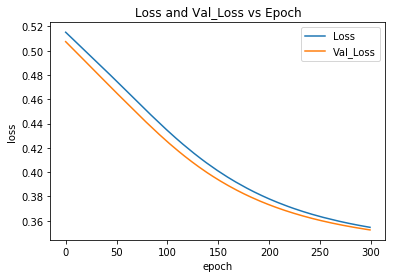

In [4]:
NN = KerasNeuralNetwork(x_train, y_train, x_test, y_test)
NN.run()
